In [1]:
import pandas as pd
import numpy as np

#### Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [2]:
df = pd.read_csv('https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/fatal-police-shootings-data.csv')

In [3]:
df['exists'] = 1
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,exists
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1


#### Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’

In [4]:
df2 = df.pivot_table(values='exists',index='race',columns='signs_of_mental_illness' ,aggfunc=np.sum)
df2
#df2[True]

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


#### Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [166]:
df2.columns

Index([False, True], dtype='object', name='signs_of_mental_illness')

In [167]:
def calculate_ratio_mi(row):
    mi = row[True]
    nmi = row[False]
    return round(mi / (mi + nmi),2)

In [168]:
df2['ratio_mental_ill_per_race'] = df2.apply(lambda row: calculate_ratio_mi(row),axis=1)

In [169]:
df2.sort_values(by="ratio_mental_ill_per_race", ascending=False) # najwyższy odsetek znamion choroby psych - W (biała?)

signs_of_mental_illness,False,True,ratio_mental_ill_per_race
race,,,
W,1763,713,0.29
A,69,24,0.26
O,37,11,0.23
N,64,14,0.18
H,745,157,0.17
B,1114,184,0.14


#### Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [170]:
df['date'] = pd.to_datetime(df['date'])

In [171]:
df['weekday'] = df['date'].dt.day_name()

In [172]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,exists,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1,Sunday


<AxesSubplot:xlabel='day,weekday'>

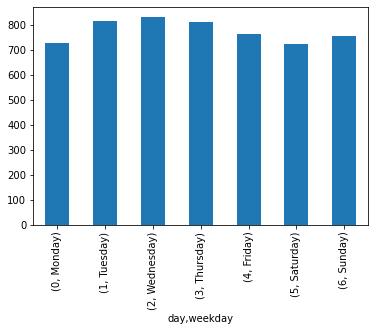

In [194]:
df['day'] = df['date'].dt.dayofweek

df[['day', 'exists', 'weekday']].groupby(['day', 'weekday']).sum().sort_index().plot(kind='bar', legend=False)

#### Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [174]:
data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [175]:
df_population = data[0][['State','Population estimate, July 1, 2019[2]']].rename(columns={'State':'state_name', 'Population estimate, July 1, 2019[2]':'population'})

In [176]:
df_population.head()

,state_name,population
0,California,39512223
1,Texas,28995881
2,New York,21477737
3,Florida,19453561
4,Illinois,12801989


In [177]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=1)

In [178]:
df_states = data[0][11:].rename(columns={'Codes:':'state_name','Unnamed: 3':'state'})[['state','state_name']]

In [179]:
df_states.head()

,state,state_name
11,AK,Alaska
12,AZ,Arizona
13,AR,Arkansas
14,CA,California
15,CO,Colorado


In [180]:
db_df =pd.merge(df_population,df_states,how='inner',on='state_name')
db_df.head()

,state_name,population,state
0,California,39512223,CA
1,Texas,28995881,TX
2,New York,21477737,NY
3,Florida,19453561,FL
4,Illinois,12801989,IL


In [181]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,exists,weekday,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,Friday,4
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1,Friday,4
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1,Saturday,5
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1,Sunday,6
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1,Sunday,6


In [182]:
df3 = df.pivot_table(values='exists',index='state',aggfunc=np.sum).rename(columns={'exists':'incidens_number'})
df3.head()

,incidens_number
state,
AK,39
AL,104
AR,83
AZ,254
CA,799


In [188]:
result_df =db_df.join(df3,how='inner',on='state')

In [189]:
result_df.head()

,state_name,population,state,incidens_number
0,California,39512223,CA,799
1,Texas,28995881,TX,481
2,New York,21477737,NY,101
3,Florida,19453561,FL,350
4,Illinois,12801989,IL,104


In [190]:
def calc_incidents_per_1000_citizens(row):
    return row['incidens_number'] / (row['population'] / 1000)

In [191]:
result_df['ratio_incidents_per_1000_citizens'] = result_df.apply(lambda row: calc_incidents_per_1000_citizens(row),axis=1)

In [187]:
result_df.sort_values(by="ratio_incidents_per_1000_citizens", ascending=False)

,state_name,population,state,incidens_number,ratio_incidents_per_1000_citizens
48,Alaska,731545,AK,39.0,0.053312
35,New Mexico,2096829,NM,106.0,0.050553
26,Oklahoma,3956971,OK,164.0,0.041446
13,Arizona,7278717,AZ,254.0,0.034896
20,Colorado,5758736,CO,195.0,0.033862
31,Nevada,3080156,NV,96.0,0.031167
39,West Virginia,1792147,WV,54.0,0.030131
43,Montana,1068778,MT,31.0,0.029005
32,Arkansas,3017825,AR,83.0,0.027503
51,Wyoming,578759,WY,14.0,0.024190
